###Extract, transform Load

In [109]:
# Import required libraries
import numpy as np
import pandas as pd
import string
import nltk
import re
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from wordcloud import WordCloud

In [3]:
#download nltk functions
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
#set pd options to display coolumns and rows
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 200)

In [6]:
#read in csv file
df_data = pd.read_csv("labeled_data.csv")
#view data frame
df_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [7]:
#delete unnamed column
df_data = df_data.drop(columns=['Unnamed: 0'])
df_data.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [8]:
#view data types
df_data.dtypes

count                  int64
hate_speech            int64
offensive_language     int64
neither                int64
class                  int64
tweet                 object
dtype: object

In [9]:
#Remove @Usernames
tweets_usernames_removed=[]
row = 0
for i in df_data['tweet']:
    text = ' '.join(re.sub("([@#][A-Za-z0-9_]+)|(\w+:\/\/\S+)"," ", i).split())
    tweets_usernames_removed.append(text)

In [10]:
#Remove Retweet tag:  RT
tweets_sub=[]
from itertools import count
for i in range(len(tweets_usernames_removed)):
  results=re.sub(r"RT", " ", tweets_usernames_removed[i])
  tweets_sub.append(results)

In [11]:
#Remove punctuation
tweets_cleaned = []
regex = re.compile("[^a-zA-Z ]")
for i in range(len(tweets_sub)):
    re_clean = regex.sub('', tweets_sub[i])
    tweets_cleaned.append(re_clean)
                

In [12]:
#Print tweets cleaned list
print(tweets_cleaned)

['    As a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out', '    boy dats coldtyga dwn bad for cuffin dat hoe in the st place', '   Dawg    You ever fuck a bitch and she start to cry You be confused as shit', '    she look like a tranny', '    The shit you hear about me might be true or it might be faker than the bitch who told it to ya  ', '  The shit just blows meclaim you so faithful and down for somebody but still fucking with hoes    ', '  I can not just sit up and HATE on another bitch  I got too much shit going on', '   cause Im tired of you big bitches coming for us skinny girls ', ' amp you might not get ya bitch back amp thats that ', ' hobbies include fighting Mariam bitch', ' Keeks is a bitch she curves everyone  lol I walked into a conversation like this Smh', ' Murda Gang bitch its Gang Land ', ' So hoes that smoke are losers   yea  go on IG', ' bad bitches is the only thing that i like ', ' bitch get up off me '

In [15]:
#Assign new column labeled "cleaned_tweets" to original dataframe and populate with data from tweets_cleaned list
df_data_cleaned = df_data.assign(cleaned_tweets = tweets_cleaned)
df_data_cleaned.head()

,count,hate_speech,offensive_language,neither,class,tweet,cleaned_tweets
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,As a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,boy dats coldtyga dwn bad for cuffin dat hoe in the st place
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,Dawg You ever fuck a bitch and she start to cry You be confused as shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,The shit you hear about me might be true or it might be faker than the bitch who told it to ya


In [16]:
#drop tweet column from df_data_cleaned
df_data_cleaned = df_data_cleaned.drop(columns=['tweet'])
df_data_cleaned.head()

,count,hate_speech,offensive_language,neither,class,cleaned_tweets
0,3,0,0,3,2,As a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out
1,3,0,3,0,1,boy dats coldtyga dwn bad for cuffin dat hoe in the st place
2,3,0,3,0,1,Dawg You ever fuck a bitch and she start to cry You be confused as shit
3,3,0,2,1,1,she look like a tranny
4,6,0,6,0,1,The shit you hear about me might be true or it might be faker than the bitch who told it to ya


### **Sentiment Analysis** 

In [17]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [18]:
# Analyze data in df_data_cleaned
all_tweets = []
i = 0
for index, row in df_data_cleaned.iterrows():
    try:
        #sentiment scoring with VADER 
        line_sentiment = analyzer.polarity_scores(row["cleaned_tweets"])
        all_tweets.append(line_sentiment)

    except AttributeError:
        pass
    
all_tweets[0:2]

[{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.2755},
 {'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'compound': -0.5423}]

In [19]:
#assign sentiment data to new data frame "sentiment_df"
sentiment_df = pd.DataFrame(all_tweets)

#Join sentiment_df to df_data_cleaned
sentiment_df = sentiment_df.join(df_data_cleaned)
sentiment_df.head()

,neg,neu,pos,compound,count,hate_speech,offensive_language,neither,class,cleaned_tweets
0,0.000,0.900,0.100,0.2755,3,0,0,3,2,As a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out
1,0.226,0.774,0.000,-0.5423,3,0,3,0,1,boy dats coldtyga dwn bad for cuffin dat hoe in the st place
2,0.620,0.380,0.000,-0.9460,3,0,3,0,1,Dawg You ever fuck a bitch and she start to cry You be confused as shit
3,0.000,0.545,0.455,0.3612,3,0,2,1,1,she look like a tranny
4,0.253,0.651,0.096,-0.6808,6,0,6,0,1,The shit you hear about me might be true or it might be faker than the bitch who told it to ya


In [21]:
#view the numerical summary of the dataframe
sentiment_df.describe()

,neg,neu,pos,compound,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,0.261961,0.630675,0.106561,-0.269340,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.230242,0.237125,0.145129,0.479265,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,0.000000,0.000000,-0.993000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.469000,0.000000,-0.659700,3.000000,0.000000,2.000000,0.000000,1.000000
50%,0.251000,0.623000,0.000000,-0.361200,3.000000,0.000000,3.000000,0.000000,1.000000
75%,0.415000,0.792000,0.190000,0.000000,3.000000,0.000000,3.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.983400,9.000000,7.000000,9.000000,9.000000,2.000000


In [22]:
#create new data frame with neg sentiment greater than .5 and class is hate speech
df_neg_tweets = sentiment_df.where(sentiment_df['neg']> 0.261961).dropna()
df_neg_hate_tweets=df_neg_tweets.where(df_neg_tweets['class']== 0).dropna()
df_neg_hate_tweets.head()

,neg,neu,pos,compound,count,hate_speech,offensive_language,neither,class,cleaned_tweets
184,0.287,0.713,0.000,-0.6633,3.0,3.0,0.0,0.0,0.0,LMFAOOOO I HATE BLACK PEOPLE This is why theres black people and niggers
202,0.277,0.389,0.334,0.1511,3.0,2.0,1.0,0.0,0.0,At least Im not a nigger Lmfao
260,0.720,0.280,0.000,-0.8271,3.0,2.0,1.0,0.0,0.0,Halloween was yesterday stupid nigger
312,0.419,0.387,0.194,-0.5423,3.0,2.0,1.0,0.0,0.0,is bored supposed to be cute you faggot Sometimes
315,0.276,0.724,0.000,-0.6077,3.0,2.0,1.0,0.0,0.0,lassen cc the coach wants me i feel it youll get more my nig no doubt


In [24]:
#create new data frame with neg sentiment greater than .5 and class is offensive speech
df_neg_offensive_tweets=df_neg_tweets.where(df_neg_tweets['class']== 1).dropna()
df_neg_offensive_tweets.head()

,neg,neu,pos,compound,count,hate_speech,offensive_language,neither,class,cleaned_tweets
2,0.620,0.380,0.000,-0.9460,3.0,0.0,3.0,0.0,1.0,Dawg You ever fuck a bitch and she start to cry You be confused as shit
6,0.477,0.523,0.000,-0.9158,3.0,0.0,3.0,0.0,1.0,I can not just sit up and HATE on another bitch I got too much shit going on
7,0.405,0.595,0.000,-0.7783,3.0,0.0,3.0,0.0,1.0,cause Im tired of you big bitches coming for us skinny girls
9,0.677,0.323,0.000,-0.7430,3.0,1.0,2.0,0.0,1.0,hobbies include fighting Mariam bitch
10,0.310,0.434,0.256,-0.2789,3.0,0.0,3.0,0.0,1.0,Keeks is a bitch she curves everyone lol I walked into a conversation like this Smh


In [26]:
#create new data frame with neutral sentiment greater than .5 and class is neither
df_neu_tweets = sentiment_df.where(sentiment_df['neu']> 0.630675).dropna()
df_neu_neither_tweets = df_neu_tweets.where(df_neu_tweets['class']==2).dropna()
df_neu_neither_tweets.head()

,neg,neu,pos,compound,count,hate_speech,offensive_language,neither,class,cleaned_tweets
0,0.000,0.900,0.100,0.2755,3.0,0.0,0.0,3.0,2.0,As a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out
40,0.239,0.761,0.000,-0.2960,3.0,0.0,1.0,2.0,2.0,momma said no pussy cats inside my doghouse
63,0.000,1.000,0.000,0.0000,3.0,0.0,0.0,3.0,2.0,SimplyAddictedToGuys woof woof hot scally lad
66,0.000,1.000,0.000,0.0000,3.0,0.0,1.0,2.0,2.0,woof woof and hot soles
67,0.000,0.763,0.237,0.4215,3.0,0.0,1.0,2.0,2.0,Lemmie eat a Oreo amp do these dishes One oreo Lol


###Ngrams and Word vectorizer

In [76]:
#Loop through df_neg_hate_tweets['cleaned_tweets'] column and append data from each row to neg_hate_tweets string
neg_hate_tweets=""

for i in df_neg_hate_tweets['cleaned_tweets']:
    neg_hate_tweets+=i+" "

In [77]:
#Loop through df_neg_tweets['cleaned_tweets'] column and append data from each row to neg_offensive_tweets string
neg_offensive_tweets=""

for i in df_neg_offensive_tweets['cleaned_tweets']:
    neg_offensive_tweets+=i+" "

In [78]:
#Loop through df_pos_tweets['cleaned_tweets'] column and append data from each row to neu_neither_tweets string
neu_neither_tweets=""

for i in df_neu_neither_tweets['cleaned_tweets']:
    neu_neither_tweets+=i+" "

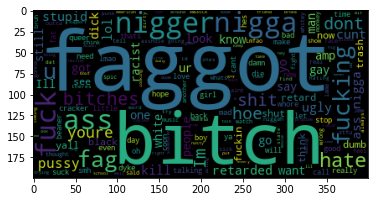

In [108]:
#count items in processed_neg_tweets
neg_counts = Counter(neg_hate_tweets)
wc = WordCloud().generate(neg_hate_tweets)
plt.imshow(wc)

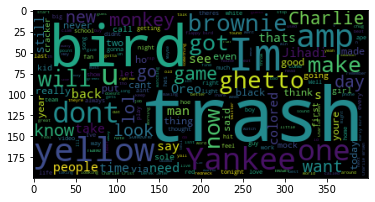

In [98]:
#count items in processed_neg_offesnive_tweets
neg_offensive_counts = Counter(processed_neg_offensive_tweets)
wc = WordCloud().generate(neu_neither_tweets)
plt.imshow(wc)

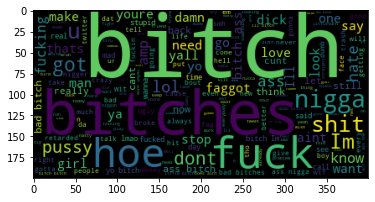

In [99]:
wc = WordCloud().generate(neg_offensive_tweets)
plt.imshow(wc)

In [86]:
#count negative tweets and store in new dataframe
df_neg_tweet_counts = pd.DataFrame.from_dict(neg_counts.items(), orient='columns')
df_neg_tweet_counts.rename(columns={0: "word", 1: "count"}, inplace =True)
df_neg_tweet_counts.head()

,word,count
0,lmfaoooo,1
1,i,184
2,hate,48
3,black,20
4,people,24


In [87]:
#sort negative tweet counts and store in new dataframe
df_neg_tweet_counts_sorted = df_neg_tweet_counts.sort_values(by='count', ascending=False).reset_index()
df_neg_tweet_counts_sorted.head(200)

,index,word,count
0,15,a,298
1,27,you,246
2,1,i,184
3,32,the,183
4,55,bitch,178
5,28,faggot,164
6,24,to,138
7,97,ass,128
8,90,fuck,102
9,9,and,101


In [74]:
print(dict(neg_counts))

NameError: ignored

In [ ]:
print(dict(neg_counts.most_common(10)))

In [88]:
#Ngram for negative hate tweets
ngram_hate_counts = Counter(ngrams(processed_neg_hate_tweets, n=3))
print(dict(ngram_hate_counts))

TypeError: ignored

In [ ]:
print(dict(ngram_hate_counts.most_common(20)))

In [ ]:
#Ngram for negative offensive tweets
ngram_offensive_counts = Counter(ngrams(processed_neg_offensive_tweets, n=3))
print(dict(ngram_offensive_counts))

In [ ]:
print(dict(ngram_offensive_counts.most_common(20)))

In [ ]:
#Ngram for neither tweets
ngram_neither_counts = Counter(ngrams(processed_neu_neither_tweets, n=3))
print(dict(ngram_neither_counts))

In [ ]:
print(dict(ngram_neither_counts.most_common(20)))

In [89]:
df_neg_hate_tweet_phrases = pd.DataFrame.from_dict(ngram_hate_counts.items(), orient='columns')
df_neg_hate_tweet_phrases.rename(columns={0: "3_word_phrase", 1: "count"}, inplace =True)
df_neg_hate_tweet_phrases.head()

NameError: ignored

In [90]:
df_neg_hate_tweet_phrases_sorted = df_neg_hate_tweet_phrases.sort_values(by='count', ascending=False)
df_neg_hate_tweet_phrases_sorted.head()

NameError: ignored

In [ ]:
df_ngram_offensive_counts_phrases = pd.DataFrame.from_dict(ngram_offensive_counts.items(), orient='columns')
df_ngram_offensive_counts_phrases.rename(columns={0: "3_word_phrase", 1: "count"}, inplace =True)
df_ngram_offensive_counts_phrases.head()

In [ ]:
df_ngram_offensive_counts_phrases_sorted = df_ngram_offensive_counts_phrases.sort_values(by='count', ascending=False)
df_ngram_offensive_counts_phrases_sorted.head()

In [ ]:
df_ngram_neither_counts_phrases = pd.DataFrame.from_dict(ngram_neither_counts.items(), orient='columns')
df_ngram_neither_counts_phrases.rename(columns={0: "3_word_phrase", 1: "count"}, inplace =True)
df_ngram_neither_counts_phrases.head()

In [ ]:
df_ngram_neither_counts_phrases_sorted = df_ngram_neither_counts_phrases.sort_values(by='count', ascending=False)
df_ngram_neither_counts_phrases_sorted.head()

In [ ]:
###### START  NAIVE BAYES  ######

In [ ]:
train_hate_tweets= processed_neg_hate_tweets
#row = 0
#for i in df_neg_hate_tweets['cleaned_tweets']:
#    train_hate_tweets.append(i)

In [ ]:
train_offensive_tweets=[]
row = 0
for i in df_neg_offensive_tweets['cleaned_tweets']:
    train_offensive_tweets.append(i)

In [ ]:
train_neu_tweets=[]
row = 0
for i in df_neu_neither_tweets['cleaned_tweets']:
    train_neu_tweets.append(i)

In [ ]:
test_neg_tweets=[]
row = 0
for i in df_neg_tweets['cleaned_tweets']:
    test_neg_tweets.append(i)

In [ ]:
test_neu_tweets=[]
row = 0
for i in df_neu_tweets['cleaned_tweets']:
    test_neu_tweets.append(i)

In [ ]:
#test_emails = {'hate':train_spam, 'spam2':train_spam2, 'ham':train_ham}
test_tweets = {'negative':test_neg_tweets, 'neither':test_neu_tweets}

In [ ]:
# make a vocabulary of unique words that occur in known hate tweets

vocab_words_hate = []

for sentence in train_hate_tweets:
    sentence_as_list = sentence.split()
    for word in sentence_as_list:
        vocab_words_hate.append(word)     
        
print(vocab_words_hate)

In [ ]:
vocab_unique_words_hate = list(dict.fromkeys(vocab_words_hate))
print(vocab_unique_words_hate)

In [ ]:
dict_hate_words = {}
word = []
hate = []
for w in vocab_unique_words_hate:
    tweets_with_w = 0     # counter
    for sentence in train_hate_tweets:
        if w in sentence:
            tweets_with_w+=1
            
    print(f"Number of hate tweets with the word {w}: {tweets_with_w}")
    total_hate_tweets = len(train_hate_tweets)
    hate_factor = (tweets_with_w+1)/(total_hate_tweets+2)
    print(f"hate factor of the word '{w}': {hate_factor} \n")
    dict_hate_words[w.lower()] = hate_factor
#     word.append(w.lower())
#     hate.append(hate_factor)
# hate_df = pd.DataFrame({"word": word, "hate_factor": hate})

In [ ]:
hate_df.sort_values(by='hate_factor')

In [ ]:
print(dict_hate_words)

In [ ]:
# make a vocabulary of unique words that occur in known ham emails

vocab_words_neu = []

for sentence in train_neu_tweets:
    sentence_as_list = sentence.split()
    for word in sentence_as_list:
        vocab_words_neu.append(word)
        
vocab_unique_words_neu = list(dict.fromkeys(vocab_words_neu))
print(vocab_unique_words_neu)

dict_neutral_words = {}
for w in vocab_unique_words_neu:
    tweets_with_w = 0     # counter
    for sentence in train_neu_tweets:
        if w in sentence:
            print(w+":", sentence)
            tweets_with_w+=1
            
    print(f"Number of neutral tweets with the word '{w}': {tweets_with_w}")
    
    total_neutral_tweets = len(train_neu_tweets)
    Neutrality = (tweets_with_w+1)/(total_neutral_tweets+2)       # Smoothing applied
    print(f"Neutrality of the word '{w}': {Neutrality} ")
    
    dict_neutral_words[w.lower()] = Neutrality
                                         # Use built-in lower() to keep all words lower case - useful later when 
                                         # comparing hatefulness vs neutrality of a single word - e.g. 'Your' and
                                         # 'your' will be treated as 2 different words if not normalized to lower
                                        # case.

In [ ]:
print(dict_neutral_words)

In [ ]:
prob_hate = len(train_hate_tweets) / (len(train_hate_tweets)+(len(train_neu_tweets)))
print(prob_hate)

In [ ]:
prob_neu = len(train_neu_tweets) / (len(train_hate_tweets)+(len(train_neu_tweets)))
print(prob_neu)

In [ ]:
tests = []
for i in test_tweets['negative']:
    tests.append(i)
    
for i in test_tweets['neither']:
    tests.append(i)
    
print(tests)    

In [ ]:
# split emails into distinct words

distinct_words_as_sentences_test = []

for sentence in tests:
    sentence_as_list = sentence.split()
    senten = []
    for word in sentence_as_list:
        senten.append(word)
    distinct_words_as_sentences_test.append(senten)

In [ ]:
print(distinct_words_as_sentences_test)

In [ ]:
test_hate_tokenized = distinct_words_as_sentences_test
test_neu_tokenized = [distinct_words_as_sentences_test[2], distinct_words_as_sentences_test[3]]
print(test_hate_tokenized)

In [ ]:
reduced_sentences_hate_test = []
for sentence in test_hate_tokenized:
    words_ = []
    for word in sentence:
        if word in vocab_unique_words_hate:
            print(f"'{word}', ok")
            words_.append(word)
        elif word in vocab_unique_words_neu:
            print(f"'{word}', ok")
            words_.append(word)
        else:
            print(f"'{word}', word not present in labelled hate training data")
    reduced_sentences_hate_test.append(words_)
print(reduced_sentences_hate_test)

In [ ]:
reduced_sentences_neu_test = []                   # repeat for ham words
for sentence in test_neu_tokenized:
    words_ = []
    for word in sentence:
        if word in vocab_unique_words_neu:
            print(f"'{word}', ok")
            words_.append(word)
        elif word in vocab_unique_words_hate:
            print(f"'{word}', ok")
            words_.append(word)
        else:
            print(f"'{word}', word not present in labelled neutral training data")
    reduced_sentences_neu_test.append(words_)
print(reduced_sentences_neu_test)

In [ ]:
test_hate_stemmed = []
non_key = ['us',  'the', 'of','your']       # non-key words, gathered from spam,ham and test sentences
for tweet in reduced_sentences_hate_test:
    tweet_stemmed=[]
    for word in tweet:
        if word in non_key:
            print('remove')
        else:
            tweet_stemmed.append(word)
    test_hate_stemmed.append(tweet_stemmed)
            
print(test_hate_stemmed)

In [ ]:
test_neu_stemmed = []
non_key = ['us',  'the', 'of', 'your'] 
for tweet in reduced_sentences_neu_test:
    tweet_stemmed=[]
    for word in tweet:
        if word in non_key:
            print('remove')
        else:
            tweet_stemmed.append(word)
    test_neu_stemmed.append(tweet_stemmed)
            
print(test_neu_stemmed)

In [ ]:
def mult(list_) :        # function to multiply all word probs together 
    total_prob = 1
    for i in list_: 
         total_prob = total_prob * i  
    return total_prob

In [ ]:
def Bayes(tweet):
    probs = []
    for word in tweet:
        Pr_H = prob_hate
        print('prob of hate in general ',Pr_H)
        try:
            Pr_HS = dict_hate_words[word]
            print(f'prob "{word}"  is a hate word : {Pr_HS}')
        except KeyError:
            Pr_HS = 1/(total_hate_tweets+2)  # Apply smoothing for word not seen in hate training data, but seen in neu training 
            print(f"prob '{word}' is a hate word: {Pr_HS}")
            
        Pr_N = prob_neu
        print('prob of neutral in general ', Pr_N)
        try:
            Pr_NW = dict_neutral_words[word]
            print(f'prob "{word}" is a neutral word: ',Pr_NW)
        except KeyError:
            Pr_NW = (1/(total_neutral_tweets+2))  # Apply smoothing for word not seen in neu training data, but seen in hate training
            print(f"NW for {word} is {Pr_NW}")
            print(f"prob '{word}' is a neutral word: {Pr_NW}")
        
        prob_word_is_hate_BAYES = (Pr_HS*Pr_H)/((Pr_HS*Pr_H)+(Pr_NW*Pr_N))
        print('')
        print(f"Using Bayes, prob the the word '{word}' is hate: {prob_word_is_hate_BAYES}")
        print('______________________________________')
        probs.append(prob_word_is_hate_BAYES)
    print(f"All word probabilities for this sentence: {probs}")
    final_classification = mult(probs)
    if final_classification >= 0.5:
        print(f'tweet is hate: with confidence of {final_classification*100}%')
    else:
        print(f'tweet is neutral: with confidence of {final_classification*100}%')
        print('______________________________________')
    return final_classification

In [ ]:
for tweet in test_hate_stemmed:
    print('')
    print(f"           Testing stemmed hate tweet {tweet} :")
    print('                 Test word by word: ')
    all_word_probs = Bayes(tweet)
    print(all_word_probs)

In [ ]:
for tweet in test_neu_stemmed:
    print('')
    print(f"           Testing stemmed neutral tweet {tweet} :")
    print('                 Test word by word: ')
    all_word_probs = Bayes(tweet)
    print(all_word_probs)

In [ ]:
###### END NAIVE BAYES  ######

### **Data Modeling and Analysis**

In [28]:
#Combine the negative hate speech and neither dataframes into one data frame.
df_hate_neutral_comb_tweets=df_neu_neither_tweets.append(df_neg_hate_tweets)
df_hate_neutral_comb_tweets.head()

,neg,neu,pos,compound,count,hate_speech,offensive_language,neither,class,cleaned_tweets
0,0.000,0.900,0.100,0.2755,3.0,0.0,0.0,3.0,2.0,As a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out
40,0.239,0.761,0.000,-0.2960,3.0,0.0,1.0,2.0,2.0,momma said no pussy cats inside my doghouse
63,0.000,1.000,0.000,0.0000,3.0,0.0,0.0,3.0,2.0,SimplyAddictedToGuys woof woof hot scally lad
66,0.000,1.000,0.000,0.0000,3.0,0.0,1.0,2.0,2.0,woof woof and hot soles
67,0.000,0.763,0.237,0.4215,3.0,0.0,1.0,2.0,2.0,Lemmie eat a Oreo amp do these dishes One oreo Lol


In [44]:
####Vectorizing tweets
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split

#Split the dataframe into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(df_hate_neutral_comb_tweets['cleaned_tweets'], df_hate_neutral_comb_tweets['class'], test_size=0.33, random_state=0)


In [45]:
#Initiate count vectorizer with stopwords
count_vectorizer_with_stpwords = CountVectorizer()
count_train_with_stpwords = count_vectorizer_with_stpwords.fit_transform(X_train)
count_test_with_stpwords = count_vectorizer_with_stpwords.transform(X_test)

#Initiate tfidf vectorizer with stopwords
tfidf_vectorizer_with_stpwords = TfidfVectorizer(max_df=0.7)
tfidf_train_with_stpwords = tfidf_vectorizer_with_stpwords.fit_transform(X_train)
tfidf_test_with_stpwords = tfidf_vectorizer_with_stpwords.transform(X_test)

#Initiate hashing vectorizor with stopwords
hashing_vectorizer_with_stpwords = HashingVectorizer(decode_error='ignore', n_features=2 ** 20, 
                                       alternate_sign=False)
hashing_train_with_stpwords = hashing_vectorizer_with_stpwords.fit_transform(X_train)
hashing_test_with_stpwords = hashing_vectorizer_with_stpwords.transform(X_test)

In [46]:
#Create a dictionary
datasets_with_stpwords = {'BoW': [count_train_with_stpwords, count_test_with_stpwords],
            'Tf-idf': [tfidf_train_with_stpwords, tfidf_test_with_stpwords],
            'Hashing': [hashing_train_with_stpwords, hashing_test_with_stpwords]}

In [47]:
#Initiate count vectorizer without stopwords
count_vectorizer_without_stpwords = CountVectorizer(stop_words='english')
count_train_without_stpwords = count_vectorizer_without_stpwords.fit_transform(X_train)
count_test_without_stpwords = count_vectorizer_without_stpwords.transform(X_test)

#Initiate tfidf vectorizer without stopwords
tfidf_vectorizer_without_stpwords = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train_without_stpwords = tfidf_vectorizer_without_stpwords.fit_transform(X_train)
tfidf_test_without_stpwords = tfidf_vectorizer_without_stpwords.transform(X_test)

#Initiate hashing vectorizor without stopwords
hashing_vectorizer_without_stpwords = HashingVectorizer(stop_words='english', decode_error='ignore', n_features=2 ** 20, 
                                       alternate_sign=False)
hashing_train_without_stpwords = hashing_vectorizer_without_stpwords.fit_transform(X_train)
hashing_test_without_stpwords = hashing_vectorizer_without_stpwords.transform(X_test)

In [48]:
datasets_without_stpwords = {'BoW': [count_train_without_stpwords, count_test_without_stpwords],
            'Tf-idf': [tfidf_train_without_stpwords, tfidf_test_without_stpwords],
            'Hashing': [hashing_train_without_stpwords, hashing_test_without_stpwords]}

In [49]:
import time
from sklearn.linear_model import PassiveAggressiveClassifier, Perceptron, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.metrics import plot_confusion_matrix, confusion_matrix

def classif_fun(datasets):
  classifiers = [PassiveAggressiveClassifier(n_jobs=-1, random_state=0), 
                SGDClassifier(n_jobs=-1, random_state=0),
                Perceptron(n_jobs=-1, random_state=0),
                RandomForestClassifier(n_estimators=300, max_depth=30, n_jobs=-1, random_state=0),
                MultinomialNB(),
                ComplementNB(),
                LinearSVC(random_state=0)]

  results_clf = dict()
  cnt = 0
  for data in datasets.keys():
      data_name = data
      train = datasets[data][0]
      test = datasets[data][1]
      for clf in classifiers:
          cnt += 1
          name = clf.__class__.__name__
          start_time = time.time()
          clf.fit(train, y_train)
          pred = clf.predict(test)
          score = metrics.accuracy_score(y_test, pred)
          cv = np.mean(cross_val_score(clf, train, y_train, scoring='accuracy', cv=5, n_jobs=-1))
          sec = time.time() - start_time
          results_clf[cnt] = [cv.round(3), score.round(3), data_name, name, sec]
  return results_clf

In [54]:
#call the classifier function to review the models with stopwords
results_with_stpwords=classif_fun(datasets_with_stpwords)

In [55]:
#create a dataframe for results with stop words
res_clf_with_stpw = pd.DataFrame.from_dict(results_with_stpwords, orient='index', 
                                 columns=['5_fold_cv_accuracy', 'Test_accuracy', 'Data', 'Model', 'Time_sec'])
res_clf_with_stpw = res_clf_with_stpw.sort_values('5_fold_cv_accuracy', ascending=False)
res_clf_with_stpw.head()

,5_fold_cv_accuracy,Test_accuracy,Data,Model,Time_sec
7,0.973,0.973,BoW,LinearSVC,0.053767
8,0.973,0.976,Tf-idf,PassiveAggressiveClassifier,0.041467
15,0.972,0.977,Hashing,PassiveAggressiveClassifier,0.234708
16,0.971,0.973,Hashing,SGDClassifier,0.282073
1,0.970,0.972,BoW,PassiveAggressiveClassifier,1.135424


In [56]:
#call the classifier function to review the models without stopwords
results_without_stpwords=classif_fun(datasets_without_stpwords)

In [57]:
#create a dataframe for results without stop words
res_clf_wout_stpw = pd.DataFrame.from_dict(results_without_stpwords, orient='index', 
                                 columns=['5_fold_cv_accuracy', 'Test_accuracy', 'Data', 'Model', 'Time_sec'])
res_clf_wout_stpw = res_clf_wout_stpw.sort_values('5_fold_cv_accuracy', ascending=False)
res_clf_wout_stpw.head()

,5_fold_cv_accuracy,Test_accuracy,Data,Model,Time_sec
8,0.976,0.975,Tf-idf,PassiveAggressiveClassifier,0.041237
15,0.975,0.976,Hashing,PassiveAggressiveClassifier,0.219589
1,0.973,0.967,BoW,PassiveAggressiveClassifier,0.041288
7,0.973,0.975,BoW,LinearSVC,0.053905
16,0.973,0.973,Hashing,SGDClassifier,0.234836


In [61]:
#Analyze using ngrams
import itertools

analyzers = ['word','char_wb']
ngrams = [(1,1), (1,2), (1,3), (2,2), (2,3), (3,3)]
max_df = [0.5, 0.6, 0.7, 0.8, 0.9]

params = [analyzers, ngrams, max_df]
print('Parameters:')
print(params)

p_list = list(itertools.product(*params))
print('\nSearch space size = ', len(p_list))

Parameters:
[['word', 'char_wb'], [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)], [0.5, 0.6, 0.7, 0.8, 0.9]]

Search space size =  60


In [62]:
#use tfdif and passive aggressive classifier to analyze types of ngrams for a good model
results = dict()
cnt = 0

for i in p_list:
    
    cnt += 1
    
    analyzer = i[0]
    ngram = i[1]
    max_df = i[2]
    
    tfidf_vectorizer = TfidfVectorizer(analyzer=analyzer, stop_words='english', max_df=max_df, ngram_range=ngram)
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test = tfidf_vectorizer.transform(X_test)
    
    from scipy import sparse

    clf = PassiveAggressiveClassifier(n_jobs=-1, random_state=0)

    clf.fit(tfidf_train, y_train)
    cv = np.mean(cross_val_score(clf, tfidf_train, y_train, scoring='accuracy', cv=5, n_jobs=-1))
    pred = clf.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    
    results[cnt] = [cv.round(3), score.round(3), analyzer, ngram, max_df]

In [63]:
#Create a dataframe for results
res = pd.DataFrame.from_dict(results, orient='index', 
                             columns=['5_fold_cv_accuracy', 'Test_accuracy', 'Analyzer', 'N_gram', 'Max_df'])
res = res.sort_values('5_fold_cv_accuracy', ascending=False)
res.head()


,5_fold_cv_accuracy,Test_accuracy,Analyzer,N_gram,Max_df
1,0.976,0.975,word,"(1, 1)",0.5
2,0.976,0.975,word,"(1, 1)",0.6
3,0.976,0.975,word,"(1, 1)",0.7
4,0.976,0.975,word,"(1, 1)",0.8
5,0.976,0.975,word,"(1, 1)",0.9


Accuracy = 0.9719


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


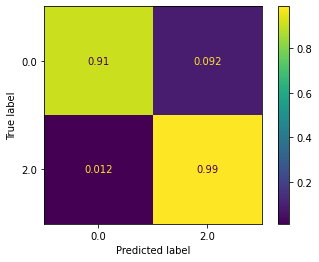

In [64]:
#confusin matrix for Tfidf vectorizer and Passive aggressive classifier
clf = PassiveAggressiveClassifier(n_jobs=-1, random_state=0)
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print(f'Accuracy = {round(score,4)}')
plot_confusion_matrix(clf, tfidf_test, y_test, normalize='true')  
# plt.show()

In [104]:
#Split the original dataframe into training and testing data sets and filter the hate and neither tweets
df_data_hate_neither=df_data_cleaned.where(df_data_cleaned['class']!=1).dropna()
X_train, X_test, y_train, y_test = train_test_split(df_data_hate_neither['cleaned_tweets'], df_data_hate_neither['class'], test_size=0.33, random_state=0)

In [105]:
#use tfdif and passive aggressive classifier to analyze types of ngrams for a good model
results = dict()
cnt = 0

for i in p_list:
    
    cnt += 1
    
    analyzer = i[0]
    ngram = i[1]
    max_df = i[2]
    
    tfidf_vectorizer = TfidfVectorizer(analyzer=analyzer, stop_words='english', max_df=max_df, ngram_range=ngram)
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test = tfidf_vectorizer.transform(X_test)
    
    from scipy import sparse

    clf = PassiveAggressiveClassifier(n_jobs=-1, random_state=0)

    clf.fit(tfidf_train, y_train)
    cv = np.mean(cross_val_score(clf, tfidf_train, y_train, scoring='accuracy', cv=5, n_jobs=-1))
    pred = clf.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    
    results[cnt] = [cv.round(3), score.round(3), analyzer, ngram, max_df]

Accuracy = 0.9057


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


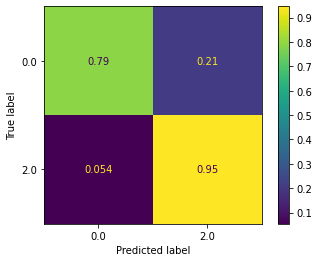

In [106]:
#confusin matrix for Tfidf vectorizer and Passive aggressive classifier for original dataframe
clf = PassiveAggressiveClassifier(n_jobs=-1, random_state=0)
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print(f'Accuracy = {round(score,4)}')
plot_confusion_matrix(clf, tfidf_test, y_test, normalize='true')  
# plt.show()